--- Preparando el entorno ---
La carpeta 'graficos' ya existe.

--- Definiendo señal y kernel ---
Señal de entrada: [-0.06, 1.2, 1.63, 3.48, 3.77, 7.0, 3.7, 2.54, 1.56, 1.77, -0.62, -0.22, -4.0, -0.94, -0.12] (Longitud: 15)
Kernel (suavizado): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333] (Longitud: 3)

--- Implementando función de convolución 1D ---
Señal resultante de la convolución (longitud 17):
[-0.02, 0.38, 0.92, 2.1, 2.96, 4.75, 4.82, 4.41, 2.6, 1.96, 0.9, 0.31, -1.61, -1.72, -1.69, -0.35, -0.04]

--- Generando gráficos ---


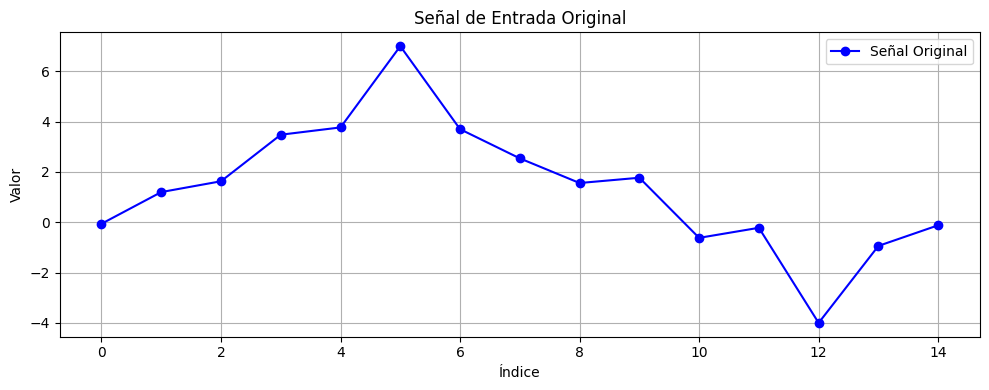

Gráfico 'señal_original.png' guardado.


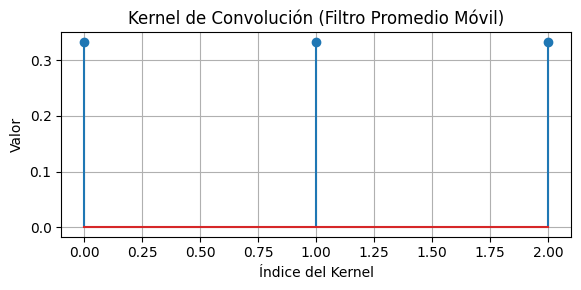

Gráfico 'kernel.png' guardado.


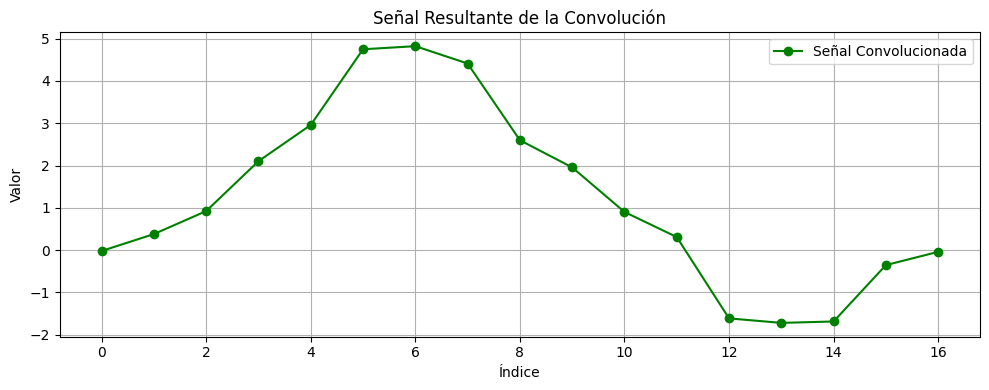

Gráfico 'resultado.png' guardado.


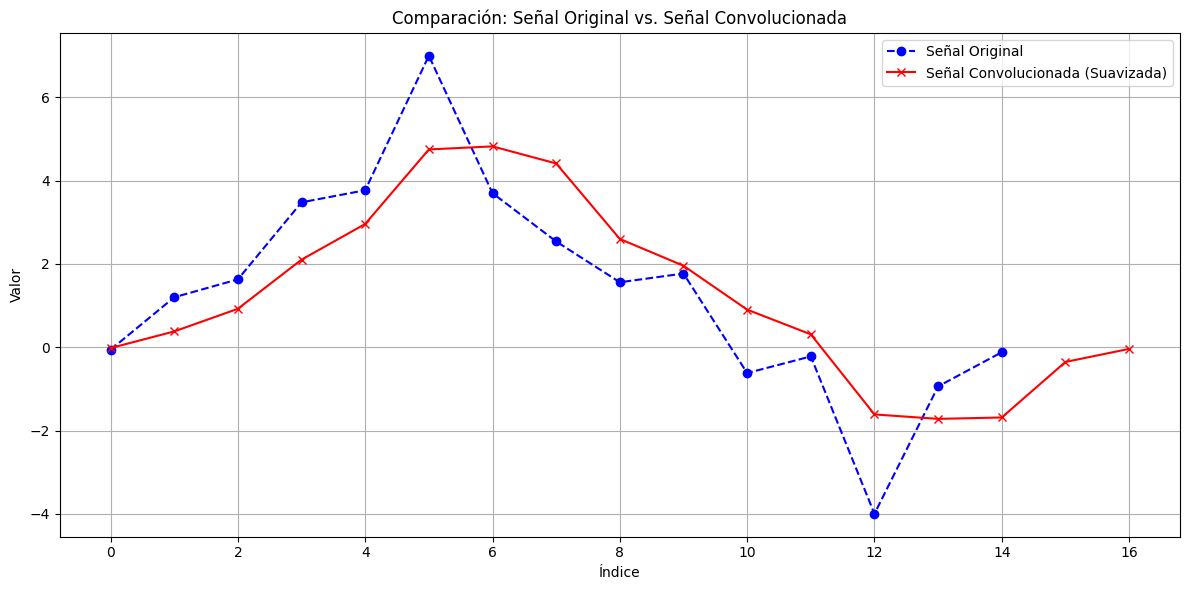

Gráfico 'comparacion_suavizado.png' guardado.

--- Proceso completado ---
Puedes descargar la carpeta 'graficos' para obtener las imágenes generadas.


In [2]:
# ejercicio_3_convolucion_1d.ipynb

import matplotlib.pyplot as plt
import os
import random # Para generar una señal con "ruido"

# --- 1. Preparación del Entorno y Creación de Carpetas ---
print("--- Preparando el entorno ---")

# Crear la carpeta de gráficos si no existe
graficos_dir = 'graficos'
if not os.path.exists(graficos_dir):
    os.makedirs(graficos_dir)
    print(f"Carpeta '{graficos_dir}' creada.")
else:
    print(f"La carpeta '{graficos_dir}' ya existe.")

# --- 2. Definir la Señal de Entrada y el Kernel ---
print("\n--- Definiendo señal y kernel ---")

# Señal de entrada con variaciones para mostrar el efecto del suavizado
# Generamos una señal base y le añadimos un poco de "ruido" o picos
base_signal = [0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, -1, -2, -1, 0]
# Añadir algunos picos o variaciones para que el suavizado sea notorio
signal = [x + random.uniform(-0.8, 0.8) for x in base_signal] # Añadir ruido pequeño
signal[5] = 7.0 # Pico alto
signal[12] = -4.0 # Pico bajo
signal = [round(x, 2) for x in signal] # Redondear para mejor visualización
print(f"Señal de entrada: {signal} (Longitud: {len(signal)})")

# Kernel de tamaño 3 (filtro de promedio móvil para suavizado)
kernel = [1/3, 1/3, 1/3]
print(f"Kernel (suavizado): {kernel} (Longitud: {len(kernel)})")


# --- 3. Implementar la Función de Convolución 1D desde Cero ---
print("\n--- Implementando función de convolución 1D ---")

def convolve_1d(signal, kernel):
    """
    Realiza una convolución unidimensional entre una señal y un kernel.

    Args:
        signal (list): La señal de entrada.
        kernel (list): El kernel de convolución.

    Returns:
        list: La señal resultante de la convolución.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)

    output_len = signal_len + kernel_len - 1
    output = [0.0] * output_len # Inicializar la salida con ceros (usar float para precision)

    # Iterar sobre cada posible posición central del kernel sobre la señal
    for i in range(output_len):
        current_output_value = 0.0
        # Iterar sobre cada elemento del kernel
        for j in range(kernel_len):
            # Calcular el índice correspondiente en la señal
            # signal_idx = i - (kernel_len - 1 - j)  # Para convolución con kernel invertido
            signal_idx = i - j # Implementación común en ML (correlación cruzada)

            # Verificar que el índice de la señal esté dentro de los límites válidos
            if 0 <= signal_idx < signal_len:
                current_output_value += signal[signal_idx] * kernel[j]
        output[i] = current_output_value

    return output

# Realizar la convolución
result_signal = convolve_1d(signal, kernel)
# Redondear la señal resultante para una mejor legibilidad en la impresión
result_signal_rounded = [round(x, 2) for x in result_signal]
print(f"Señal resultante de la convolución (longitud {len(result_signal_rounded)}):")
print(result_signal_rounded)

# --- 4. Graficar la Señal, el Kernel y el Resultado con Matplotlib ---
print("\n--- Generando gráficos ---")

# Graficar Señal Original
plt.figure(figsize=(10, 4))
plt.plot(signal, marker='o', linestyle='-', color='blue', label='Señal Original')
plt.title('Señal de Entrada Original')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(graficos_dir, 'señal_original.png'))
plt.show()
print("Gráfico 'señal_original.png' guardado.")

# Graficar Kernel
plt.figure(figsize=(6, 3))
plt.stem(kernel) # CORREGIDO: Eliminado use_line_collection=True
plt.title('Kernel de Convolución (Filtro Promedio Móvil)')
plt.xlabel('Índice del Kernel')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(graficos_dir, 'kernel.png'))
plt.show()
print("Gráfico 'kernel.png' guardado.")

# Graficar Señal Resultante
plt.figure(figsize=(10, 4))
plt.plot(result_signal, marker='o', linestyle='-', color='green', label='Señal Convolucionada')
plt.title('Señal Resultante de la Convolución')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(graficos_dir, 'resultado.png'))
plt.show()
print("Gráfico 'resultado.png' guardado.")


# --- NUEVA GRÁFICA: Comparación de Señal Original vs. Convolucionada ---
plt.figure(figsize=(12, 6))
plt.plot(signal, marker='o', linestyle='--', color='blue', label='Señal Original')
# Ajustar el rango del eje x para la señal convolucionada si la longitud difiere
# Podemos recortar la señal convolucionada para que tenga la misma longitud que la original
# o ajustar el eje x para que ambas se muestren correctamente.
# Para este caso, mostraremos ambas en su longitud completa y ajustaremos los límites si es necesario.
# Si el kernel es simétrico y quieres que el "suavizado" se alinee con la señal original,
# podrías considerar una convolución 'same' y recortar los bordes extra del 'full' output.
# Sin embargo, para esta implementación básica de "full", simplemente graficamos ambas.

# Para una comparación visual más directa del suavizado, a menudo se recorta la señal convolucionada
# para que tenga la misma longitud que la original (equivalente a convolución 'same' con padding).
# Aquí, simplemente graficaremos ambas en su extensión completa para mostrar el resultado "full".
plt.plot(range(len(result_signal)), result_signal, marker='x', linestyle='-', color='red', label='Señal Convolucionada (Suavizada)')

plt.title('Comparación: Señal Original vs. Señal Convolucionada')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(graficos_dir, 'comparacion_suavizado.png'))
plt.show()
print("Gráfico 'comparacion_suavizado.png' guardado.")


print("\n--- Proceso completado ---")
print("Puedes descargar la carpeta 'graficos' para obtener las imágenes generadas.")